<a href="https://colab.research.google.com/github/marypthomas/ai-bootcamp-osu/blob/main/Session_9/AIBootCamp_NeuralNetworkWithImages_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Practical Workflows for Images**
**Authors**:
- Dr. Chaitanya Kulkarni, Meta (formerly Facebook)
- Dr. Jany Chan, The Ohio State University
- Prof. Raghu Machiraju, The Ohio State University

## **Goals**
The goals of this session is to 
- discuss workflows for images
- leverage deep learning technologies
- training models
- evaluating models
- get familar with Tensor Flow

The [MNIST data](http://yann.lecun.com/exdb/mnist/) will be used. 

The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

## **Resources**
Please find sources that provide description of various CNNs and other networks

- https://en.wikipedia.org/wiki/Convolutional_neural_network

- https://towardsdatascience.com/illustrated-10-cnn-architectures-95d78ace614d

- https://medium.com/datadriveninvestor/five-powerful-cnn-architectures-b939c9ddd57b

- Neural network playground : https://playground.tensorflow.org/

- Alexnet : http://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf

- ResNet: https://arxiv.org/abs/1512.03385
InceptionNet-v3: https://arxiv.org/abs/1512.00567

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.datasets.mnist as mnist

## **Preamble**

In [ ]:
(trainX,trainy),(testX,testy) = mnist.load_data()

#trainX: uint8 NumPy array of grayscale image data with shapes (60000, 28, 28), containing the training data. Pixel values range from 0 to 255.
#trainy: uint8 NumPy array of digit labels (integers in range 0-9) with shape (60000,) for the training data.
#testX: uint8 NumPy array of grayscale image data with shapes (10000, 28, 28), containing the test data. Pixel values range from 0 to 255.
#testy: uint8 NumPy array of digit labels (integers in range 0-9) with shape (10000,) for the test data.



11490434/11490434 [==============================] - 0s 0us/step


## **Training**

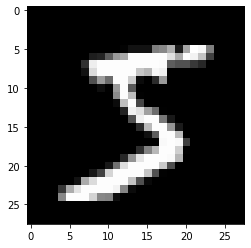

In [ ]:
plt.imshow(trainX[0],cmap=plt.get_cmap('gray'))
plt.show()

In [ ]:
print(trainX[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

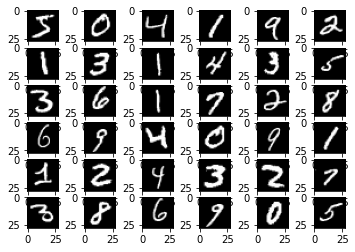

In [ ]:
# plot the first 36 images to see what they look like
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.imshow(trainX[i],cmap=plt.get_cmap('gray'))
plt.show()

## **A Convolutional Neural Network for MNIST Data** 

In [ ]:
# Reshape for Conv2D to indicate one channel (greyscale) inputs
trainX = trainX.reshape((trainX.shape[0],trainX.shape[1],trainX.shape[2],1))
testX = testX.reshape((testX.shape[0], testX.shape[1],testX.shape[2],1))
in_shape=trainX.shape[1:]

# Get the number of unique labels from the y training set
n_classes = len(np.unique(trainy))

# Scale the pixels to between 0 and 1
trainX = trainX.astype('float32')/255.0
testX = testX.astype('float32')/255.0
print(trainX.shape)

(60000, 28, 28, 1)


In [ ]:
# Set up our convolutional model
model = tf.keras.models.Sequential()
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D#args
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D 
# Feature learning layers - convolution and max pooling
model.add(tf.keras.layers.Conv2D(32,(3,3), activation='relu',kernel_initializer='he_uniform',input_shape=in_shape))
model.add(tf.keras.layers.MaxPool2D((2,2)))
# Classification layers
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout 
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(100,activation='relu',kernel_initializer='he_uniform'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(n_classes,activation='softmax'))

In [ ]:
# https://keras.io/api/models/model_training_apis/
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

## **Training Model**

In [ ]:
model.fit(trainX,trainy,epochs=20,batch_size=128,verbose=1)

Epoch 1/20
469/469 [==============================] - 46s 85ms/step - loss: 0.3724 - accuracy: 0.8864
Epoch 2/20
469/469 [==============================] - 32s 69ms/step - loss: 0.1535 - accuracy: 0.9552
Epoch 3/20
469/469 [==============================] - 35s 74ms/step - loss: 0.1133 - accuracy: 0.9664
Epoch 4/20
469/469 [==============================] - 34s 71ms/step - loss: 0.0964 - accuracy: 0.9712
Epoch 5/20
469/469 [==============================] - 34s 71ms/step - loss: 0.0804 - accuracy: 0.9765
Epoch 6/20
469/469 [==============================] - 36s 77ms/step - loss: 0.0693 - accuracy: 0.9788
Epoch 7/20
469/469 [==============================] - 38s 81ms/step - loss: 0.0626 - accuracy: 0.9807
Epoch 8/20
469/469 [==============================] - 35s 74ms/step - loss: 0.0593 - accuracy: 0.9811
Epoch 9/20
469/469 [==============================] - 33s 70ms/step - loss: 0.0545 - accuracy: 0.9828
Epoch 10/20
469/469 [==============================] - 36s 77ms/step - loss: 0.047

In [ ]:
loss,acc = model.evaluate(trainX,trainy)

1875/1875 [==============================] - 15s 8ms/step - loss: 0.0032 - accuracy: 0.9991


In [ ]:
print('Accuracy: %.3f' % acc)
print('Loss: %.3f' % loss)

Accuracy: 0.999
Loss: 0.003


In [ ]:
image = trainX[0]
yhat = model.predict(np.asarray([image]))
print('Predicted: class=%d' % np.argmax(yhat))
print(yhat)

1/1 [==============================] - 0s 161ms/step
Predicted: class=5
[[5.8336586e-18 1.5381514e-14 1.0896709e-18 2.1663037e-04 1.7767221e-20
  9.9978334e-01 1.2483042e-10 4.1436504e-17 8.3081701e-12 1.7075457e-09]]


In [ ]:
loss, acc = model.evaluate(testX,testy)

313/313 [==============================] - 3s 9ms/step - loss: 0.0523 - accuracy: 0.9858


In [ ]:
print('Accuracy: %.3f' % acc)
print('Loss: %.3f' % loss)

Accuracy: 0.986
Loss: 0.052


1875/1875 [==============================] - 16s 9ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5923
           1       1.00      1.00      1.00      6742
           2       1.00      1.00      1.00      5958
           3       1.00      1.00      1.00      6131
           4       1.00      1.00      1.00      5842
           5       1.00      1.00      1.00      5421
           6       1.00      1.00      1.00      5918
           7       1.00      1.00      1.00      6265
           8       1.00      1.00      1.00      5851
           9       1.00      1.00      1.00      5949

    accuracy                           1.00     60000
   macro avg       1.00      1.00      1.00     60000
weighted avg       1.00      1.00      1.00     60000



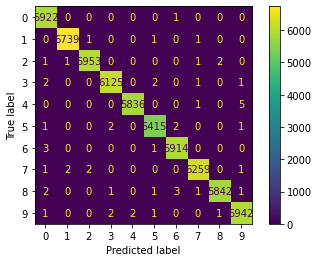

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

#Print final classification report
tmp = np.argmax(model.predict(trainX),axis=1)
y_true,y_pred = trainy,tmp
print(classification_report(y_true,y_pred))
cm=confusion_matrix(trainy,y_pred)
matrix = ConfusionMatrixDisplay(confusion_matrix=cm)
matrix.plot()
plt.show()

In [ ]:
loss, acc = model.evaluate(testX,testy)

313/313 [==============================] - 2s 8ms/step - loss: 0.0523 - accuracy: 0.9858


In [ ]:
print('Accuracy: %.3f' % acc)
print('Loss: %.3f' % loss)

Accuracy: 0.986
Loss: 0.052


Score for fold 1: loss of 0.06353163719177246: accuracy of 98.54999780654907%


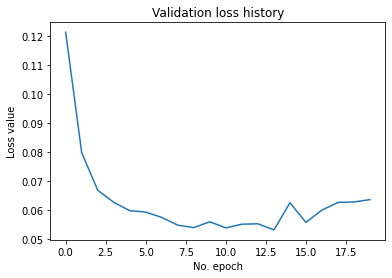

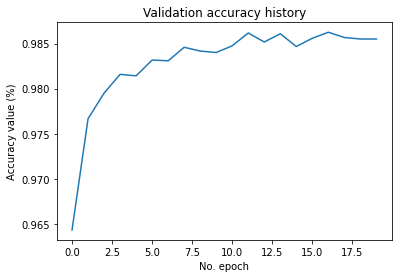

Score for fold 2: loss of 0.051432881504297256: accuracy of 98.7416684627533%


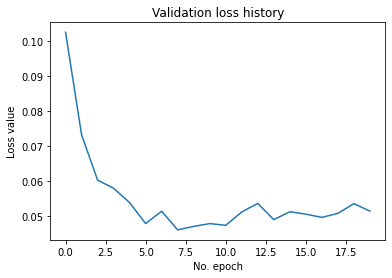

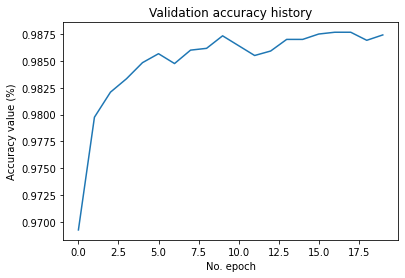

Score for fold 3: loss of 0.05677812546491623: accuracy of 98.57500195503235%


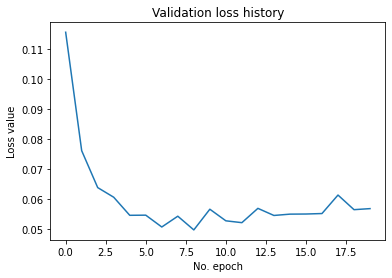

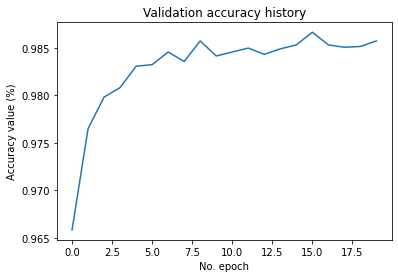

Score for fold 4: loss of 0.050557106733322144: accuracy of 98.7833321094513%


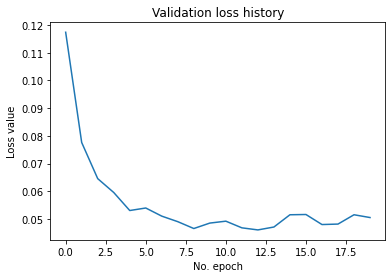

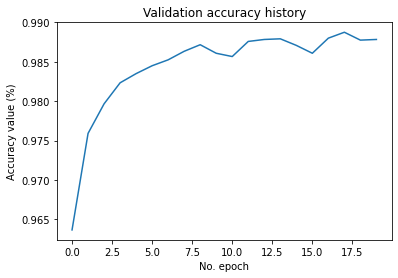

Score for fold 5: loss of 0.05566641315817833: accuracy of 98.64166378974915%


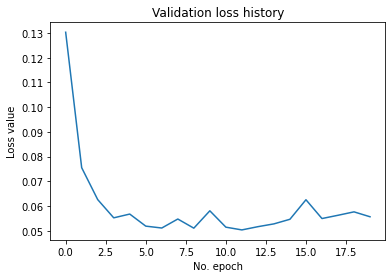

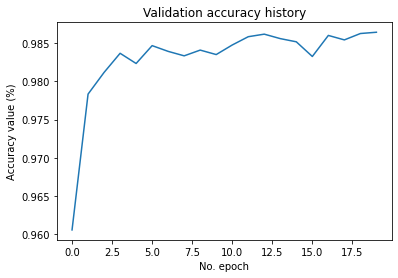

In [ ]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5, shuffle=True)

acc_fold = []
loss_fold = []

fold_no = 1
for train,test in kfold.split(trainX,trainy):
    X_tr = trainX[train]
    y_tr = trainy[train]
    X_cv = trainX[test]
    y_cv = trainy[test]
    
    # Set up our convolutional model
    model = tf.keras.models.Sequential()
    # Feature learning layers - convolution and max pooling
    model.add(tf.keras.layers.Conv2D(32,(3,3), activation='relu',kernel_initializer='he_uniform',input_shape=in_shape))
    model.add(tf.keras.layers.MaxPool2D((2,2)))
    # Classification layers
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(100,activation='relu',kernel_initializer='he_uniform'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(n_classes,activation='softmax'))
    model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    
    history = model.fit(X_tr,y_tr,epochs=20,batch_size=128,validation_data=(X_cv,y_cv),verbose=False)
    scores = model.evaluate(X_cv,y_cv,verbose=False)

    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}: {model.metrics_names[1]} of {scores[1]*100}%')
    fold_no = fold_no + 1
    plt.plot(history.history['val_loss'])
    plt.title('Validation loss history')
    plt.ylabel('Loss value')
    plt.xlabel('No. epoch')
    plt.show()
    
    plt.plot(history.history['val_accuracy'])
    plt.title('Validation accuracy history')
    plt.ylabel('Accuracy value (%)')
    plt.xlabel('No. epoch')
    plt.show()
    acc_fold.append(scores[1])
    loss_fold.append(scores[0])

In [ ]:
print('Average scores')
print('Accuracy: %.3f' % np.mean(acc_fold))
print('Loss: %.3f' % np.mean(loss_fold))

Average scores
Accuracy: 0.987
Loss: 0.056
